In [9]:
import pandas
import altair as alt

In [16]:
flu = pandas.read_csv('flunet2010_11countries.csv', header=1)

In [17]:
flu.head()

,week,Afghanistan,Argentina,Australia,Canada,China,Colombia,Egypt,Germany,Ireland,South Africa,USA
0,1,5.0,4,2,41,2179,36,739,26.0,23,0,366
1,2,13.0,21,1,15,2213,36,396,24.0,8,1,396
2,3,4.0,6,1,8,2228,14,192,18.0,4,0,447
3,4,0.0,1,0,14,2027,11,80,NaN,8,0,402
4,5,0.0,4,1,12,1813,8,56,NaN,4,0,404


In [18]:
alt.Chart(flu).mark_point()

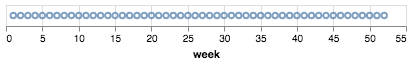

In [19]:
alt.Chart(flu).mark_point().encode(x='week')

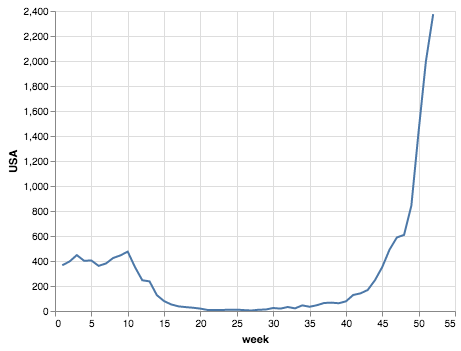

In [25]:
alt.Chart(flu).mark_line().encode(x='week', y='USA')

In [40]:
cols = flu.columns.tolist()
norm = pandas.melt(flu, id_vars=[cols[0]], value_vars=cols[1:], var_name='country')
norm.head()

,week,country,value
0,1,Afghanistan,5.0
1,2,Afghanistan,13.0
2,3,Afghanistan,4.0
3,4,Afghanistan,0.0
4,5,Afghanistan,0.0


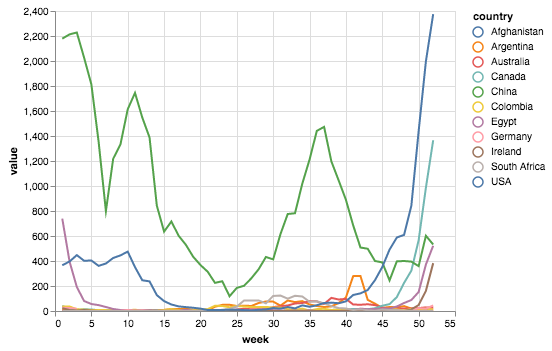

In [43]:
lines = alt.Chart(norm).mark_line().encode(x='week', y='value', color='country')
lines

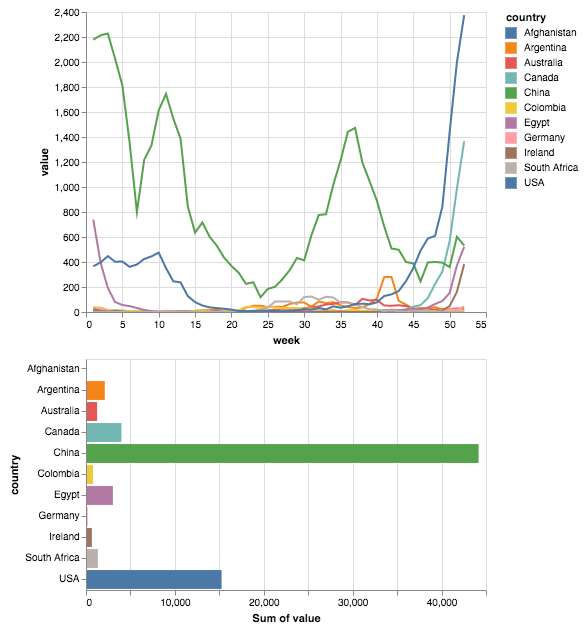

In [78]:
# This brush and the conditional color only really make sense with point data.
brush = alt.selection_interval(encodings=['x'])

lines = alt.Chart(norm).mark_line().encode(
    x='week', y='value',
    color='country'
).add_selection(brush)

bars = alt.Chart().mark_bar().encode(
    y='country', color='country', x='sum(value)'
).transform_filter(brush)

alt.vconcat(lines, bars, data=norm)